In [42]:
# Importing required libraries
##--------------------------##
# Pandas library imported with alias pd - read and analyse data from a dataset at a memory location

# confusion matrix imported from SKlearn library to evaluate the performance of prediction
# classification report imported from SKlearn library to show the precision, recall, F1 Score, and support
# confusionmatrixDisplay imported from SKlearn library NxN matrix to hold the confusion matrix

# Pyplot imported with alias plt form Matplotlib library - to plot the confusion matrix 
##--------------------------##

import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [43]:
# Reading the input files
##--------------------##
# Read the dataset in the csv file KannadaChatGPTFinalRES, a csv file and store the resulting DataFrames in the variable df_chatgpt(i)
# Merge the 2 DataFrames to form a single DataFrame for further preprocessing
##--------------------##

df_chatgpt1 = pd.read_csv('/kaggle/input/chatgptkoffin/Trans_kan_dev(1).csv', usecols = ['chatgpt_pred', 'label'], engine = 'python',  encoding = 'unicode_escape')
df_chatgpt2 = pd.read_csv('/kaggle/input/chatgptkoffin/Trans_kan_test.csv', usecols = ['chatgpt_pred', 'label'], engine = 'python',  encoding = 'unicode_escape')
df_chatgpt = df_chatgpt1.append(df_chatgpt2)

/tmp/ipykernel_33/2777216127.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_chatgpt = df_chatgpt1.append(df_chatgpt2)


In [44]:
# Preview and Preprocessing
##-----------------------##
# Preview - checking for NULL or illegitimate values
##-----------------------##

print(df_chatgpt.head())
print(df_chatgpt.isnull().values.any()) #False => No NULL Values present in the DataFrame

           label chatgpt_pred
0  Not_offensive           NO
1    not-Kannada           NK
2    not-Kannada           NK
3  Not_offensive           NO
4  Not_offensive           NO
False


In [45]:
##-----------------------##
# Preprocessing - removing labels: not-Kannada to enhance performance
##-----------------------##

def remlabel(label):
    if(label == 'not-Kannada'):
        return None
    else:
        return label
df_chatgpt['label'] = df_chatgpt['label'].apply(remlabel)
df_chatgpt = df_chatgpt.dropna().reset_index()
df_chatgpt.head()

,index,label,chatgpt_pred
0,0,Not_offensive,NO
1,3,Not_offensive,NO
2,4,Not_offensive,NO
3,6,Not_offensive,NO
4,7,Not_offensive,NO


In [46]:
##-----------------------##
# Preprocessing - Converting values predicted by ChatGPT to comparable, usable and meaningful quantities
##-----------------------##

def repl_val(sentiment):
    if (sentiment == 'OTIG'):
        return 'Offensive_Targeted_Insult_Group'
    elif (sentiment == 'OTII'):
        return 'Offensive_Targeted_Insult_Individual'
    elif (sentiment == 'OU'):
        return 'Offensive_Untargetede'
    elif (sentiment == 'OTIO'):
        return 'Offensive_Targeted_Insult_Other'
    elif (sentiment == 'NO'):
        return 'Not_offensive'
df_chatgpt['chatgpt_pred'] = df_chatgpt['chatgpt_pred'].apply(repl_val)
df_chatgpt['chatgpt_pred'].value_counts()

Not_offensive                           894
Offensive_Targeted_Insult_Individual    130
Offensive_Targeted_Insult_Group          69
Offensive_Untargetede                    55
Offensive_Targeted_Insult_Other          31
Name: chatgpt_pred, dtype: int64

In [47]:
# Computation of results
##--------------------##
# Comparing ChatGPT predicted Sentiments with the originally assigned sentiments
##--------------------##

sentiment = df_chatgpt['label']
chatgpt_pred = df_chatgpt['chatgpt_pred']

true = 0
falsepos = 0
falseneg = 0
false = 0
total = 0
for i in range(0, len(df_chatgpt['label'])):
    if (sentiment[i] == chatgpt_pred[i]):
        true += 1
    total += 1
        
print('True: ', true)

True:  1123


In [48]:
##--------------------##
# Computation - Manually computing accuracy score
##--------------------##

print(true / len(df_chatgpt['label']))

0.9525021204410518


In [49]:
# Final Results
##-----------##
# Final Percentage Accuracy
##-----------##

accuracy = (true / total) * 100
print(f'Final Accuracy: {accuracy}%')

Final Accuracy: 95.25021204410518%


In [50]:
##-----------##
# Classification report - Accuracy, Precision, Recall and F1 scores for each class
##-----------##

print(classification_report(sentiment, chatgpt_pred, zero_division = 0, digits = 4))

                                      precision    recall  f1-score   support

                       Not_offensive     0.9519    0.9977    0.9742       853
     Offensive_Targeted_Insult_Group     0.9710    0.7528    0.8481        89
Offensive_Targeted_Insult_Individual     0.9846    0.9078    0.9446       141
     Offensive_Targeted_Insult_Other     0.8387    0.8667    0.8525        30
               Offensive_Untargetede     0.9273    0.7727    0.8430        66

                            accuracy                         0.9525      1179
                           macro avg     0.9347    0.8595    0.8925      1179
                        weighted avg     0.9530    0.9525    0.9507      1179



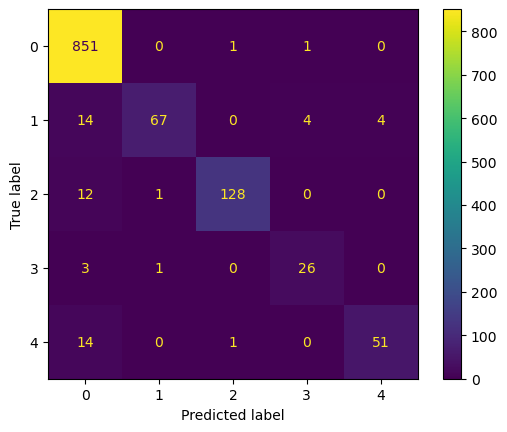

In [51]:
##-----------##
# Confusion Matrix - Showing number of True, False, False Positive and False Negative Predictions
##-----------##

cm = confusion_matrix(sentiment, chatgpt_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show() 